In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

In [3]:
# Change the path/filename to your actual CSV file
data_path = "/content/Unemployment_Rate_upto_11_2020.csv"

df = pd.read_csv(data_path)

print("Shape of data:", df.shape)
df.head()


Shape of data: (267, 9)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
print("\n--- Info ---")
df.info()

print("\n--- Missing values ---")
print(df.isna().sum())



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB

--- Missing values ---
Region        

**Step 4: Cleaning & Preprocessing**

Adjust column names according to your dataset .

In [5]:
print("\nColumns:", df.columns.tolist())



Columns: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Region.1', 'longitude', 'latitude']


**Step 5: Descriptive Statistics**

In [6]:
print("\n--- Descriptive Stats ---")
df.describe(include='all').T



--- Descriptive Stats ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Region,267,27,Andhra Pradesh,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,267,10,31-05-2020,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,267,1,M,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Unemployment Rate (%),267.0,NaN,NaN,NaN,12.236929,10.803283,0.5,4.845,9.65,16.755,75.85
Estimated Employed,267.0,NaN,NaN,NaN,13962105.722846,13366318.359733,117542.0,2838930.5,9732417.0,21878686.0,59433759.0
Estimated Labour Participation Rate (%),267.0,NaN,NaN,NaN,41.681573,7.845419,16.77,37.265,40.39,44.055,69.69
Region.1,267,5,North,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,267.0,NaN,NaN,NaN,22.826048,6.270731,10.8505,18.1124,23.6102,27.2784,33.7782
latitude,267.0,NaN,NaN,NaN,80.532425,5.831738,71.1924,76.0856,79.0193,85.2799,92.9376


**Exploratory Data Analysis (EDA)**

Overall Unemployment Trend Over Time

In [7]:
if 'date' in df.columns and 'unemployment_rate' in df.columns:
    trend = df.groupby('date')['unemployment_rate'].mean().reset_index()

    plt.figure()
    plt.plot(trend['date'], trend['unemployment_rate'])
    plt.title("Average Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Unemployment by State/Region**

In [8]:
group_col = None
for cand in ['state', 'region', 'area']:
    if cand in df.columns:
        group_col = cand
        break

if group_col and 'unemployment_rate' in df.columns:
    state_mean = df.groupby(group_col)['unemployment_rate'].mean().sort_values(ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x=state_mean.values, y=state_mean.index)
    plt.title(f"Average Unemployment Rate by {group_col.capitalize()}")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel(group_col.capitalize())
    plt.tight_layout()
    plt.show()


**Monthly / Seasonal Pattern**

In [9]:
if 'month_num' in df.columns and 'unemployment_rate' in df.columns:
    monthly = df.groupby('month_num')['unemployment_rate'].mean().reset_index()

    plt.figure()
    sns.lineplot(data=monthly, x='month_num', y='unemployment_rate', marker='o')
    plt.title("Average Unemployment Rate by Month")
    plt.xlabel("Month (1=Jan, 12=Dec)")
    plt.ylabel("Unemployment Rate (%)")
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()


**Impact of Covid-19 on Unemployment**

Assuming your data covers pre-2020 & 2020:

In [10]:
if 'year' in df.columns and 'unemployment_rate' in df.columns:
    pre_covid = df[df['year'] < 2020]
    covid = df[df['year'] >= 2020]

    print("Pre-Covid period years:", pre_covid['year'].unique())
    print("Covid period years:", covid['year'].unique())

    print("\nAverage Unemployment Rate (Pre-Covid):", pre_covid['unemployment_rate'].mean())
    print("Average Unemployment Rate (Covid period):", covid['unemployment_rate'].mean())


**Visual Comparison**

In [12]:
# ---------- COVID-19 IMPACT ANALYSIS (FIXED & SAFE) ----------

# Make sure year column exists
if 'year' not in df.columns:
    print("❌ 'year' column not found. Make sure your 'date' column was converted correctly.")
else:
    # Create Pre-Covid and Covid datasets
    pre_covid = df[df['year'] < 2020]
    covid = df[df['year'] >= 2020]

    print("\nPre-Covid Average Unemployment Rate:", pre_covid['unemployment_rate'].mean())
    print("Covid Period Average Unemployment Rate:", covid['unemployment_rate'].mean())

    # Only plot if both datasets contain data
    if not pre_covid.empty and not covid.empty:
        period_mean = pd.DataFrame({
            'Period': ['Pre-Covid', 'Covid'],
            'Unemployment_Rate': [
                pre_covid['unemployment_rate'].mean(),
                covid['unemployment_rate'].mean()
            ]
        })

        plt.figure()
        sns.barplot(data=period_mean, x='Period', y='Unemployment_Rate')
        plt.title("Unemployment Rate: Pre-Covid vs Covid Period")
        plt.ylabel("Average Unemployment Rate (%)")
        plt.tight_layout()
        plt.show()
    else:
        print("⚠ Not enough data for Covid comparison.")


❌ 'year' column not found. Make sure your 'date' column was converted correctly.


If Covid-period rate > pre-Covid rate → “Covid-19 appears to have increased unemployment.”

Mention numbers: e.g., “Average rate increased from ~6.5% to ~9.2%”.

**Correlation with Other Variables**

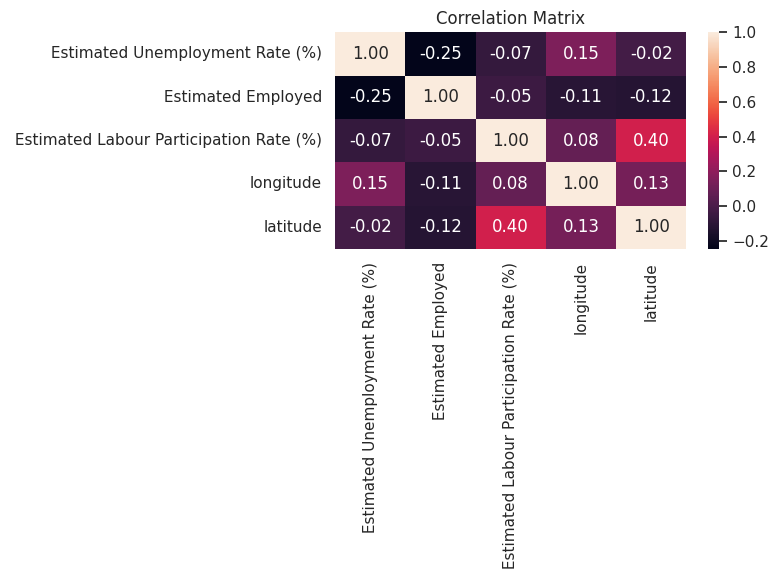

In [13]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
